In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

### ***Numpy Arrays***

- **0-dimensional array:** A NumPy array with no square brackets is considered a 0-dimensional array, also called a scalar. This means it contains only a single value, not a collection of elements. For example: np.array(4)

- **1-dimensional array:** A NumPy array with one set of square brackets is a 1-dimensional array, which is often called a vector. This contains a sequence of numbers arranged in a line (like a list or a single row). For example: np.array([1,2,3])

- **2-dimensional array:** A NumPy array with two sets of square brackets is a 2-dimensional array, also called a matrix. This is essentially an array of arrays (a collection of rows or columns). For example, np.array([[1,2,3],[4,5,6]])

In [2]:
# Create a 1D array (vector)

array1 = np.array([1,2,3])
print(f"1D Array: {array1}")

1D Array: [1 2 3]


In [3]:
# Create a 2D Array

array2 = np.array([[1,2,3],
                 [4,5,6]]) # Better format for visualization
print(f"2D Array:\n {array2}")

2D Array:
 [[1 2 3]
 [4 5 6]]


### ***Linear Regression with Gradient Descent***

Linear regression is used to model the relationship between a dependent variable \( y \) and one or more independent variables \( x \), assuming this relationship is linear.

The model is represented by:

$y = wx + b$

Where:
- $y$: Dependent variable
- $x$: Independent variable
- b: Intercept
- w: Slope (how much $y$ changes with $x$

In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.


In [4]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [5]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [6]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

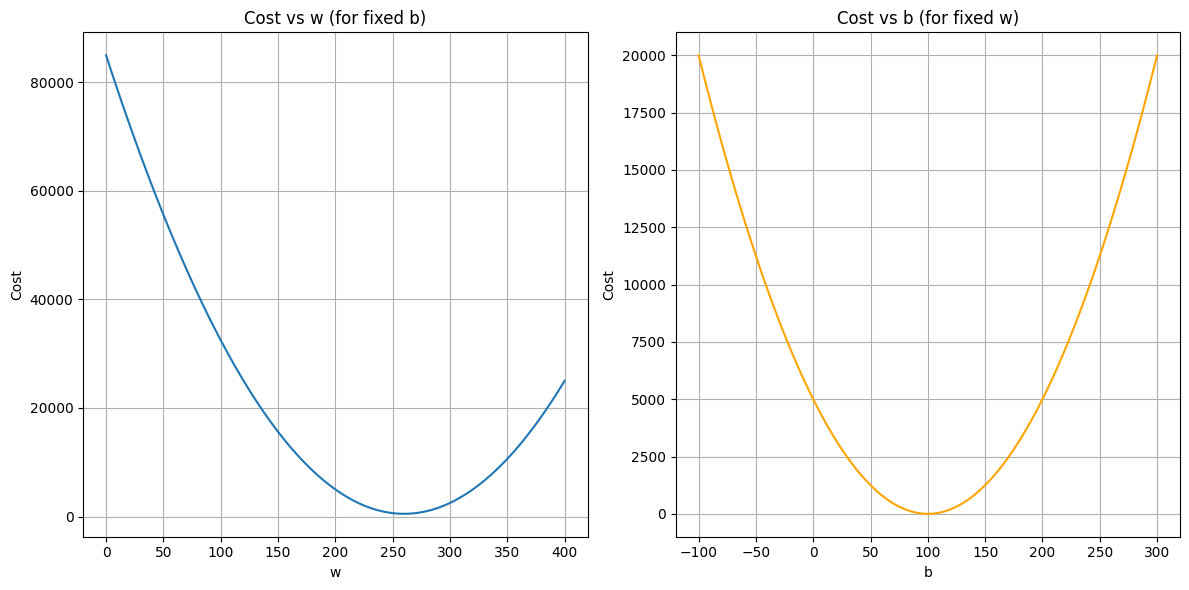

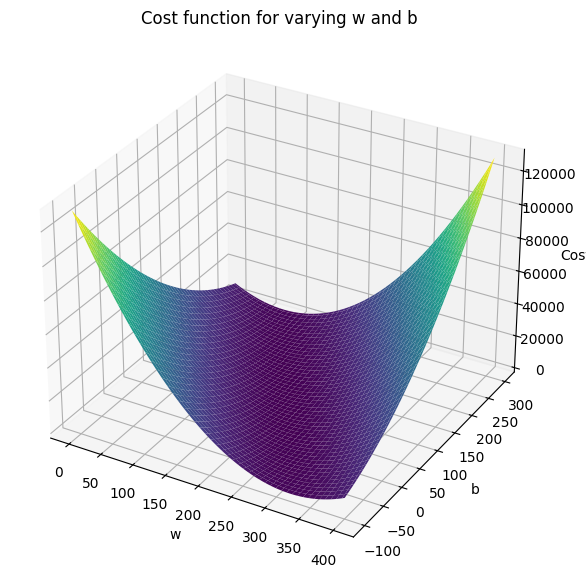

In [7]:
# Generate a range of values for w and b to visualize the cost function
w_values = np.linspace(0, 400, 100)
b_values = np.linspace(-100, 300, 100)
cost_values = np.zeros((len(w_values), len(b_values)))

# Compute cost for each combination of w and b
for i in range(len(w_values)):
    for j in range(len(b_values)):
        cost_values[i, j] = compute_cost(x_train, y_train, w_values[i], b_values[j])

# 2D visualization (Cost vs w for a fixed b and Cost vs b for a fixed w)
plt.figure(figsize=(12, 6))

# Plot Cost vs w for a fixed b (e.g., b = 0)
fixed_b = 0
cost_vs_w = [compute_cost(x_train, y_train, w, fixed_b) for w in w_values]
plt.subplot(1, 2, 1)
plt.plot(w_values, cost_vs_w, label=f"b = {fixed_b}")
plt.xlabel('w')
plt.ylabel('Cost')
plt.title('Cost vs w (for fixed b)')
plt.grid(True)

# Plot Cost vs b for a fixed w (e.g., w = 200)
fixed_w = 200
cost_vs_b = [compute_cost(x_train, y_train, fixed_w, b) for b in b_values]
plt.subplot(1, 2, 2)
plt.plot(b_values, cost_vs_b, label=f"w = {fixed_w}", color='orange')
plt.xlabel('b')
plt.ylabel('Cost')
plt.title('Cost vs b (for fixed w)')
plt.grid(True)

plt.tight_layout()
plt.show()

# 3D visualization of Cost(w, b)
W, B = np.meshgrid(w_values, b_values)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, cost_values.T, cmap='viridis')

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
ax.set_title('Cost function for varying w and b')

plt.show()

In [8]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [9]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 15000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1500: Cost 1.64e+00  dj_dw: -2.577e-01, dj_db:  4.170e-01   w:  1.965e+02, b: 1.05713e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4500: Cost 2.06e-02  dj_dw: -2.887e-02, dj_db:  4.671e-02   w:  1.996e+02, b: 1.00640e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7500: Cost 2.59e-04  dj_dw: -3.233e-03, dj_db:  5.231e-03   w:  2.000e+02, b: 1.00072e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02
Iteration 10500: Cost 3.25e-06  dj_dw: -3.621e-04, dj_db:  5.859e-04   w:  2.000e+02, b: 1.00008e+02
Iteration 12000: Cost 3.64e-07  dj_dw: -1.212e-04, dj_db:  1.961e-04   w:  2.000e+02, b: 1.00003e+02
Iteration 13500: Cost 4.07e-08  dj_dw: -4.055e-05, dj_db:  6.562e-05   w:  2.000e+02, b: 1.00001e+

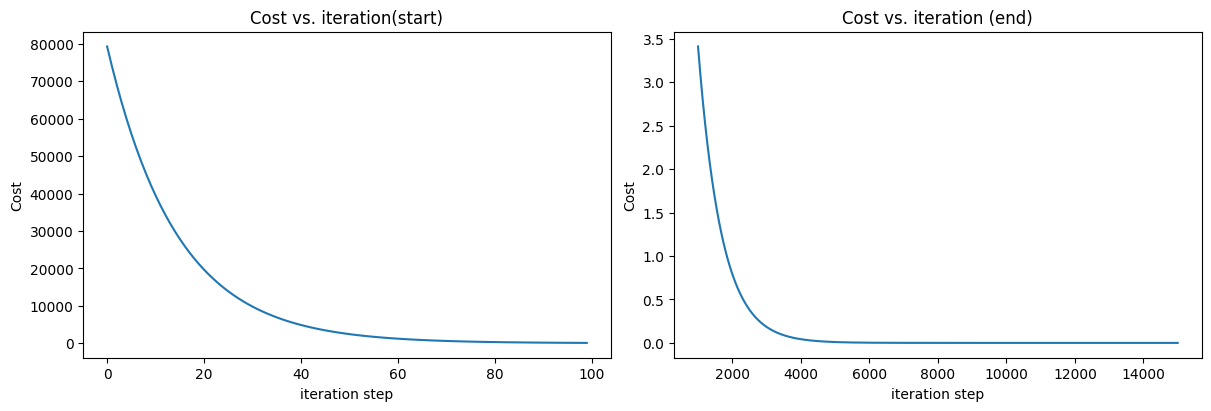

In [10]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [11]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars
